# Experimentation in the Portuguese Corpus

The objective of this notebook is to analyze the Portuguese Corpus and to examine the results obtained by applying the Part of Speech HMM tagger that we have developed.

## What is Part-of-Speech
The aim of Part-of-Speech is to refer to the syntactic role of each word in a sentence. Universal Dependencies (UD) includes a total of 17 tags where we can find:

*   **Adjectives (ADJ)**: Noun modifiers describing properties.
*   **Adverb (ADV)**: Verb modifiers of time, place, manner.
*   **Noun (NOUN)**: words for persons, places, things, etc.
*   **Proper noun (PROPN)**: name of person, organization, place, etc.
*   **Interjection (INTJ)**: exclamation, greeting, yes/no response, etc.
*   **Adposition (ADP)**: marks a noun's spacial, temporal or other relation.
*   **Auxiliary (AUX)**: helping verb marking tense, aspect, mood, etc.
*   **Coordinating Conjuction (CCONJ)**: joins teo phrases/clauses.
*   **Determiner (DET)**: marks noun phrase properties.
Numeral (NUM)
*   **Particle (PART)**: a preposition-like form used together with a verb.
*   **Pronoun (PRON)**: a shorthand for referring to an entity or event.
*   **Subordinating Conjunction (SCONJ)**: joins a main clause with subordinate clause.
*   **Punctuation (PUNCT)**
*   **Symbols (SYM)**
*   **Other X**

## The Corpus
UD_Portuguese-PetroGold is a fully revised treebank which consists of academic texts from the oil & gas domain in Brazilian Portuguese. The dataset is obtained from the official Universal Dependencies (UD) [site](https://universaldependencies.org/), where we can find more details about the origin of the data and the anotation of the Corpus.

The corpus consists of 3 CoNLL-U files (train, dev and test). As it is explained in the [official UD website](https://universaldependencies.org/format.html), the CoNLL-U files contain 3 types of lines: word lines, blank lines and sentece-level comments. Sentence are composed of one or more word lines, and word lines contain the following fields:
*   **ID**: Word index in the actual sentence.
*   **FORM**: Word form or punctuation symbol.
*   **LEMMA**: Lemma or stem of word form.
*   **UPOS**: Universal part-of-speech tag.
*   **XPOS**: Optional languager or treebank-specific PoS / morphological tag.
*   **FEATS**: Lits of morphological features.
*   **HEAD**: Head of the current word.
*   **DEPREL**: Universal dependency relation to the Head.
*   **DEPS**: Enhanced dependency graph.
*   **MISC**: Other anotations.

For the Part-of-Speech task the only necessary fields are the FORM and the UPOS. Let's see the structure and some real examples of the data:

In [155]:
# ONLY NECESARY WHEN WORKING WITH GOOGLE COLAB
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

The following libraries are necessary to perform the data analysis

In [156]:
import numpy as np
import matplotlib.pyplot as plt

First we must read the conllu files so we created the following method:

In [157]:
def conllu_preprocess(file):
    data_file = open(file, "r", encoding="utf-8")
    corpus = []
    sentence = []
    for line in data_file:
        line = line.split('\t')
        if len(line) > 2:
            if '-' not in line[0]:
                if int(line[0]) == 1:
                    if sentence != []:
                        corpus.append(sentence)
                    sentence = [(line[1].lower(), line[3])]
                else:
                    sentence.append((line[1].lower(), line[3]))
    corpus.append(sentence)
    return corpus

In [158]:
# CHANGE THE DIRECTORY TO YOUR OWN LOCATION OF FILES
fTrain = '../Corpus/Portuguese/pt_petrogold-ud-train.conllu'
fDev = '../Corpus/Portuguese/pt_petrogold-ud-dev.conllu'
fTest = '../Corpus/Portuguese/pt_petrogold-ud-test.conllu'

trainCorpus = conllu_preprocess(fTrain)
devCorpus = conllu_preprocess(fDev)
testCorpus = conllu_preprocess(fTest)

As we can see in the [official treebank hub page](https://universaldependencies.org/treebanks/pt_petrogold/index.html), the corpus contains in total 8946 sentences and 250605 syntactic words:

In [159]:
print("Size of TOTAL Corpus: " + str(len(trainCorpus)+len(devCorpus)+len(testCorpus)))
print("Total number of Tokens in Corpus: " + str(np.sum(list(len(item) for item in trainCorpus))+np.sum(list(len(item) for item in devCorpus))+np.sum(list(len(item) for item in testCorpus))))

Size of TOTAL Corpus: 8946
Total number of Tokens in Corpus: 250605


We can also see these words and sentences distributed in each train, dev and test files:

In [160]:
print("Size of Train Corpus: " + str(len(trainCorpus)))
print("Example of Sentence in Train Corpus: " + str(' '.join(item[0] for item in trainCorpus[2])))
print("Example of Tagged Sentence in Train Corpus: " + str(trainCorpus[2]))
print("Mean of number of Tokens in a Sentence in Train Corpus: " + str(np.mean(list(len(item) for item in trainCorpus))) +'\n')

print("Size of Dev Corpus: " + str(len(devCorpus)))
print("Example of Sentence in Dev Corpus: " + str(' '.join(item[0] for item in devCorpus[2])))
print("Example of Tagged Sentence in Dev Corpus: " + str(devCorpus[2]))
print("Mean of number of Tokens in a Sentence in Dev Corpus: " + str(np.mean(list(len(item) for item in devCorpus))) +'\n')

print("Size of Test Corpus: " + str(len(testCorpus)))
print("Example of Sentence in Test Corpus: " + str(' '.join(item[0] for item in testCorpus[2])))
print("Example of Tagged Sentence in Test Corpus: " + str(testCorpus[2]))
print("Mean of number of Tokens in a Sentence in Test Corpus: " + str(np.mean(list(len(item) for item in testCorpus)))+'\n')

Size of Train Corpus: 7170
Example of Sentence in Train Corpus: a caracterização estrutural para a porção norte de a bacia de pelotas foi realizada através de 17 seções sísmicas , onde foram caracterizadas falhas normais , em padrão dominó , falhas sintéticas e antitéticas e lístricas , além de a identificação de estruturas como o arco de torres ( fonseca 2006 ) , ( alves 1981 ) a plataforma de florianópolis individualizada por gonçalves et al. ( 1979 ) , zona de falha de o rio grande ( miranda 1970 ) , ( kowsmann 1974 ) .
Example of Tagged Sentence in Train Corpus: [('a', 'DET'), ('caracterização', 'NOUN'), ('estrutural', 'ADJ'), ('para', 'ADP'), ('a', 'DET'), ('porção', 'NOUN'), ('norte', 'ADJ'), ('de', 'ADP'), ('a', 'DET'), ('bacia', 'PROPN'), ('de', 'ADP'), ('pelotas', 'PROPN'), ('foi', 'AUX'), ('realizada', 'VERB'), ('através', 'ADV'), ('de', 'ADP'), ('17', 'NUM'), ('seções', 'NOUN'), ('sísmicas', 'ADJ'), (',', 'PUNCT'), ('onde', 'ADV'), ('foram', 'AUX'), ('caracterizadas', 'VERB'

It is also mentioned that there are 18272 multi-word tokens that include: contractions of determiners/prepositions, some hyphenated words, mesoclisis and enclisis. For instance: do, desses, disso, encontra-se, observou-se, deve-se...

In [161]:
def count_multi_word_tokens(file):
    data_file = open(file, "r", encoding="utf-8")
    count = 0
    multi_word = []
    for line in data_file:
        line = line.split('\t')
        if len(line) > 2:
            if '-' in line[0]:
              count+=1
              multi_word.append(line[1])
    print("Some examples of multi-word tokens: " + str(multi_word) +'\n')
    return count

print("Total number of multi-word tokens: " + str(count_multi_word_tokens(fTrain)+count_multi_word_tokens(fDev)+count_multi_word_tokens(fTest)))

Some examples of multi-word tokens: ['na', 'às', 'da', 'da', 'do', 'na', 'da', 'da', 'da', 'deste', 'do', 'do', 'da', 'da', 'da', 'do', 'da', 'DA', 'do', 'do', 'ao', 'do', 'do', 'na', 'na', 'destes', 'na', 'na', 'da', 'à', 'do', 'no', 'Nesta', 'das', 'do', 'das', 'do', 'nesta', 'da', 'do', 'da', 'destas', 'ao', 'dos', 'ao', 'do', 'do', 'no', 'da', 'das', 'na', 'nas', 'dos', 'nas', 'da', 'nos', 'do', 'da', 'destas', 'do', 'nos', 'às', 'do', 'ao', 'da', 'dos', 'da', 'do', 'do', 'na', 'do', 'na', 'do', 'dos', 'no', 'no', 'do', 'do', 'do', 'no', 'do', 'das', 'na', 'da', 'da', 'do', 'pela', 'do', 'no', 'utilizando-se', 'no', 'dos', 'do', 'da', 'na', 'da', 'das', 'na', 'do', 'da', 'destes', 'na', 'da', 'da', 'nos', 'Ao', 'da', 'dos', 'dos', 'ao', 'do', 'do', 'do', 'do', 'do', 'do', 'à', 'na', 'pela', 'dos', 'do', 'do', 'do', 'do', 'do', 'aos', 'da', 'ao', 'ao', 'pelo', 'às', 'na', 'do', 'deste', 'deste', 'destas', 'dos', 'pelo', 'dos', 'da', 'desta', 'na', 'da', 'dos', 'na', 'do', 'do', 'do'

Taking a closer look, we can see how many different tags and words exist in each of these data splits. As it is mentioned in the official documentation, out of the 17 tags mentioned at the beggining, only 16 appear in the Corpus:

In [162]:
def analyze_tags(corpus):
  words = set()
  tags = set()
  tag_words = {}
  count_words_tag = {}
  for sentence in corpus:
    for pair in sentence:
      words.add(pair[0])
      tags.add(pair[1])
      if pair[1] in tag_words:
        tag_words[pair[1]].append(pair[0])
        count_words_tag[pair[1]] += 1
      else:
        tag_words[pair[1]] = [pair[0]]
        count_words_tag[pair[1]] = 1

  return words, tags, tag_words, count_words_tag

words_train, tags_train, tag_words_train, count_words_tag_train = analyze_tags(trainCorpus)
words_dev, tags_dev, tag_words_dev, count_words_tag_dev = analyze_tags(devCorpus)
words_test, tags_test, tag_words_test, count_words_tag_test = analyze_tags(testCorpus)

print("NUMBER OF DIFFERENT WORDS IN TRAIN:", len(words_train))
print("NUMBER OF DIFFERENT TAGS IN TRAIN:", len(tags_train))
print("POSSIBLE TAGS IN TRAIN: " + str(list(tags_train)))
print("WORDS FOR EACH TAG IN TRAIN: " + str(tag_words_train))
print("DISTRIBUTION OF TAGS: " + str(count_words_tag_train))
print("\n")

print("NUMBER OF DIFFERENT WORDS IN DEV:", len(words_dev))
print("NUMBER OF DIFFERENT TAGS IN DEV:", len(tags_dev))
print("POSSIBLE TAGS IN DEV: " + str(list(tags_dev)))
print("WORDS FOR EACH TAG IN DEV: " + str(tag_words_dev))
print("DISTRIBUTION OF TAGS: " + str(count_words_tag_dev))
print("\n")

print("NUMBER OF DIFFERENT WORDS IN TEST:", len(words_test))
print("NUMBER OF DIFFERENT TAGS IN TEST:", len(tags_test))
print("POSSIBLE TAGS IN TEST: " + str(list(tags_test)))
print("WORDS FOR EACH TAG IN TEST: " + str(tag_words_test))
print("DISTRIBUTION OF TAGS: " + str(count_words_tag_test))

NUMBER OF DIFFERENT WORDS IN TRAIN: 13420
NUMBER OF DIFFERENT TAGS IN TRAIN: 16
POSSIBLE TAGS IN TRAIN: ['PRON', 'PUNCT', 'NUM', 'INTJ', 'ADV', 'SYM', 'AUX', 'ADJ', 'CCONJ', 'PROPN', 'VERB', 'ADP', 'SCONJ', 'X', 'DET', 'NOUN']
WORDS FOR EACH TAG IN TRAIN: {'NUM': ['1', '1', '17', '2006', '1981', '1979', '1970', '1974', '2011', '90', '2012', '2000', '1', '2', '3', '440', '530', '278', '048', '162', '482', '2', '4', '9', '90', '17', '4.1', '2006', '1995', '2007', '1994', '1990', '2011', '1994', '1986', '4.2', '9', '90', '3', '4.3', '4.3.1', '1995', '2011', '3x3', '1995', '4.3.2', '2011', '4.4', '1755', '1500', '6', '1', '0007', '1', '0007', '0231-1355', 'dois', '0231-1355', 'seis', '4.5', '4.6', '4', '5', '5.1', '1973', '1973', '1984', '5', '450', '700', '1996', '1966', '1969', '1977', '1400', '2000', '2004', '1981', '1985', '5', '2004', '5.2', '6', '1,5', 'milhão', '5.3', '2004', '10.000', '1989', '8', '1995', '2007', '9', '5.3.1', '1994', '1994', '5.3.2', '5.3.3', '2007', 'dois', '5.3.


The *PART* tag is missing from all splits. According to the [universal dependencies website](https://universaldependencies.org/pt/) this tag refers to prefixes such as *anti*, *pré*, or *pós* when they appear as separate tokens from the word they complement.

The *INTJ* tag is missing in the *dev* and *test* splits. It often referes to words used as an exclamation or as part of one, which includes combination of sounds otherwise not present in the language (like *uhuh* in English to express negation).

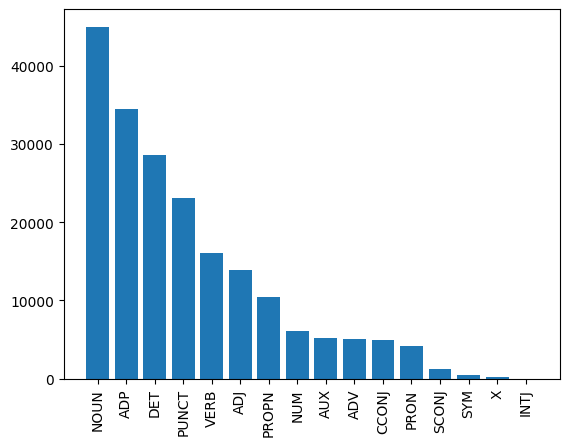

In [163]:
count_words_tag_train = {k: v for k, v in sorted(count_words_tag_train.items(), key=lambda item: item[1], reverse=True)}
plt.bar(count_words_tag_train.keys(), count_words_tag_train.values())
plt.xticks(rotation='vertical')
plt.show()

## Hidden Markov Model(HMM)
In the HMM models we need the following elements:
*   A set of N states (tags): Q = q1, q2, ..., qN
*   A sequence of T observations (words): O = o1, o2,...,oT
*   A transition probability matrix: A = a11,..., aNN
*   A sequence of observation likelihoods: B = bi(ot)
*   An initial probability distribution over states: π = π1, ..., πN

We also need to make the following two simplifying assumptions:
*   Markov assumption: the probability of a particular state only depends on the previous state.
> $$P(q_i | q_1,..., q_{i-1}) = P(q_i|q_{i-1})$$

*   Output independence: the probability of an output observation depends only on the current state.
> $$P(o_1|q_1,...,q_T,o_1,...,o_T) = P(o_i|q_i)$$

To assign a tag to a new sentence we use the Viterbi algorithm. Instead of enumerating all posisible tag sequences, Viterbi makes use of the Markov assumption in the HMM to make the calculations faster:
> $$
argmax_{y \in Y} = \prod_{i=1}^{n+1} p(y_i | y_{i-1}) \prod_{i=1}^{n} p(x_i | y_{i})
$$

If we have very long sentences multiplying probabilities will produce very small numbers which may end up with 0 probabilities because of underflow. In our tagger we use log probabilities to avoid this problem.

> $$
argmax_{y \in Y} = \sum_{i=1}^{n+1} log p(y_i | y_{i-1}) \sum_{i=1}^{n} log p(x_i | y_{i})
$$

HMM model is a generative model so to calculate the probabilities we do the same as with language models:
> $$q(y_i | y_{i-1}) = \frac{count(y_{i-1}, y_i)}{count(y_{i-1})}$$

A problem that we might encounter during the evaluation process is to find a word that we haven't seen in training. A possible solution for this is to replace all infrequent words with a single UNK token. To determine which tokens are treated as UNK tokens, we require to set a threshold of number of apparitions of said token in the corpus. There is no clear ruling as to which is the optimal value for this threshold.

Another approximation we developed is the use of suffixes instead of words for the emission matrix. This approach is based on the idea that words with the same syntactic role may share the suffix due to morphological rules. For example: 'realmente', 'positivamente', 'antigamente', and 'naturalmente' all of them are adverbs and share the suffix '-mente'.

The class created for the Hidden Markov Model is the following:

In [164]:
import pickle
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from collections import Counter
from tabulate import tabulate

class HMM_PoS_Tagger:
    def __init__(self):
        ud_pos_tags = ["Start", "ADJ", "ADP", "ADV", "AUX", "CCONJ", "DET", "INTJ", "NOUN", "NUM", "PART", "PRON", "PROPN", "PUNCT", "SCONJ", "SYM", "VERB", "X"]
        ud_prev_tags = ["ADJ", "ADP", "ADV", "AUX", "CCONJ", "DET", "INTJ", "NOUN", "NUM", "PART", "PRON", "PROPN", "PUNCT", "SCONJ", "SYM", "VERB", "X", "Stop"]
        # Initialization of every transition log-probability to negative infinity
        # 'Start' tag only present as a previous tag, 'Stop' as a final tag
        self.trans_prob = {tag: {subtag: 0.0001 for subtag in ud_prev_tags} for tag in ud_pos_tags}
        self.emis_prob = {}
        self.suffix_prob = {}
        self.multi_word_tokens = {}

    def setMultiTokensDict(self,multi_word_tokens):
        self.multi_word_tokens = multi_word_tokens

    def infrequent_words_to_unk(self, trainCorpus, unk_value):
        words_count = {}

        # we calculate the distribution for each word
        for sentence in trainCorpus:
            for pair in sentence:
                if pair[0] in words_count:
                    words_count[pair[0]] +=1
                else:
                    words_count[pair[0]] = 1


        # we replace all infrequent words with a single 'UNK' token
        new_trainCorpus = []
        for sentence in trainCorpus:
            new_sentence = []
            for pair in sentence:
                if words_count[pair[0]] < unk_value:
                    new_sentence.append(('UNK', pair[1]))
                else:
                    new_sentence.append(pair)
            new_trainCorpus.append(new_sentence)

        return new_trainCorpus

    def suffix_matrix(self, trainCorpus):
        for sentence in trainCorpus:
            for pair in sentence:
                if(len(pair[0])>4):
                    suffix = pair[0][len(pair[0])-4:]
                    tag = pair[1]

                    # Build the matrix by counting the number of appearances of each suffix and tag
                    # Suffix matrix
                    if suffix not in self.suffix_prob.keys():
                        self.suffix_prob[suffix] = {}
                        self.suffix_prob[suffix][tag] = 1
                    else:
                        if tag not in self.suffix_prob[suffix].keys():
                            self.suffix_prob[suffix][tag] = 1
                        else:
                            self.suffix_prob[suffix][tag] += 1

        # Change from the count to the log probability of apparitions
        # Suffix matrix
        for suf in self.suffix_prob.keys():
            total_apariciones = sum(self.suffix_prob[suf].values())
            for tag in self.suffix_prob[suf].keys():
                conteo_tag = self.suffix_prob[suf][tag]
                self.suffix_prob[suf][tag] = np.log(conteo_tag / total_apariciones)

    def train(self, trainCorpus, suffix = False, unk_value=3):
        print("Training...")

        # Data is a list of lists (sentences) of tuples word-tag
        if suffix:
            self.suffix_matrix(trainCorpus)

        trainCorpus = self.infrequent_words_to_unk(trainCorpus, unk_value=unk_value)

        for sentence in trainCorpus:

            prev_tag = "Start"  # Tag for calculating the initial probabilities
            for pair in sentence:
                word = pair[0]
                tag = pair[1]

                # Build the matrices by counting the number of appearances of each word and tag
                # Emission matrix
                if word not in self.emis_prob.keys():
                    self.emis_prob[word] = {}
                    self.emis_prob[word][tag] = 1
                else:
                    if tag not in self.emis_prob[word].keys():
                        self.emis_prob[word][tag] = 1
                    else:
                        self.emis_prob[word][tag] += 1

                # Transition matrix, check if cell value is negative infinity first
                self.trans_prob[prev_tag][tag] += 1
                prev_tag = tag

            # Add the probability of the tag being terminal to the transition matrix
            self.trans_prob[prev_tag]["Stop"] += 1

        # Change from the count to the log probability of apparitions
        # Emission matrix
        for word in self.emis_prob.keys():
            total_apariciones = sum(self.emis_prob[word].values())
            for tag in self.emis_prob[word].keys():
                conteo_tag = self.emis_prob[word][tag]
                self.emis_prob[word][tag] = np.log(conteo_tag / total_apariciones)

        # Transition matrix
        for prev_tag in self.trans_prob.keys():
            total_apariciones = sum(self.trans_prob[prev_tag].values())
            for tag in self.trans_prob[prev_tag].keys():
                conteo_tag = self.trans_prob[prev_tag][tag]
                self.trans_prob[prev_tag][tag] = np.log(conteo_tag / total_apariciones)

        # There are combinations of word-tag that might not appear in the training corpus
        # To deal with those cases, we must check if the entry exists in the matrices and if not, assign a
        # negative infinite log-probability

    def eval(self, testCorpus):
        # First, obtain the gold metrics to compare the predictions
        gold_tags = []
        test_sentences = []

        for sent in testCorpus:
            words = []
            for pair in sent:
                gold_tags.append(pair[1])
                words.append(pair[0])
            test_sentences.append(" ".join(words))

        # Sentences are in a list of lists
        # Gold tags are just a list

        # Then, we obtain de predictions of the model using the predict() method
        predictions = []
        for sentence in test_sentences:
            best_path = self.predict(sentence)
            # The predict method returns a list of tuples word-tag, we just need the tags
            predictions.extend([tag for word, tag in best_path])
            
        return gold_tags, predictions
    
    def evaluate(self, testCorpus):
        print("Evaluating...\n")

        gold_tags, predictions = self.eval(testCorpus)

        gold_counts = Counter(gold_tags)
        predictions_counts = Counter(predictions)
        tags = set(gold_tags).union(set(predictions))

        countsTable = []

        for tag in tags:
            gold_counts_tag = gold_counts.get(tag, 0)
            predictions_counts_tag = predictions_counts.get(tag, 0)
            diff = gold_counts_tag - predictions_counts_tag
            if diff < 0:
                diff = abs(diff)
            countsTable.append([tag, gold_counts_tag, predictions_counts_tag, diff])

        metricsResuts = [["Accuracy",str(self.accuracy(gold_tags, predictions))] , ["Precison",str(self.precision(gold_tags, predictions))], ["Recall",str(self.recall(gold_tags, predictions))],["F1 Score",str(self.f1_score(gold_tags, predictions))]]
        tableCounts = tabulate(countsTable, ["Tag", "Gold counts", "Prediction counts", "Difference"], tablefmt="grid")
        tableMetrics = tabulate(metricsResuts, ["Metric", "Score"], tablefmt="grid")

        print("The results of the evaluations are:\n")
        print("Metrics:\n")
        print(tableMetrics)
        print("\nCounts' differences:\n")
        print(tableCounts + "\n")

        self.confusion_matrix(gold_tags, predictions)
        
    def evaluate_summary(self, testCorpus):
        # First, obtain the gold metrics to compare the predictions
        gold_tags, predictions = self.eval(testCorpus)

        metricsResults = [["Accuracy",str(self.accuracy(gold_tags, predictions))] , ["Precison",str(self.precision(gold_tags, predictions))], ["Recall",str(self.recall(gold_tags, predictions))],["F1 Score",str(self.f1_score(gold_tags, predictions))]]
        tableMetrics = tabulate(metricsResults, ["Metric", "Score"], tablefmt="grid")

        print("Metrics:\n")
        print(tableMetrics)
        
    def evaluate_per_tag(self, testCorpus):
        # First, obtain the gold metrics to compare the predictions
        gold_tags, predictions = self.eval(testCorpus)

        print(classification_report(gold_tags, predictions, digits=4))

    def accuracy(self, gold_tags, predictions):
        # At this point, both gold and pred are lists of tags
        score = len([1 for x, y in zip(gold_tags, predictions) if x == y])
        total = len(gold_tags)
        acc = accuracy_score(gold_tags, predictions)

        print("SCORE:", score, "/", total)
        return acc

    def precision(self, gold_tags, predictions):
        # At this point, both gold and pred are lists of tags
        precision = precision_score(gold_tags, predictions, average="weighted")

        return precision

    def recall(self, gold_tags, predictions):
        # At this point, both gold and pred are lists of tags
        recall = recall_score(gold_tags, predictions, average="weighted")

        return recall

    def f1_score(self, gold_tags, predictions):
        # At this point, both gold and pred are lists of tags
        fscore = f1_score(gold_tags, predictions, average="weighted")

        return fscore

    def confusion_matrix(self, gold_tags, predictions):
        # At this point, both gold and pred are lists of tags
        conf_matrix = confusion_matrix(gold_tags, predictions)

        display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=sorted(set(gold_tags).union(set(predictions))))
        fig, ax = plt.subplots()
        display.plot(ax=ax)
        ax.set_xticklabels(display.display_labels, rotation=-45)
        ax.set_title("Confusion matrix", loc="center")
        plt.show()

        return conf_matrix

    def predict(self, sentence):
        # The prediction of the Hidden Markov Models depend on two assumptions
        # 1.- Markov assumption: the probability of a particular state only depends on the previous state.
        # 2.- Output independence: the probability of an output observation depends only on the current state.
        start = True
        tags = self.trans_prob.keys()
        best_path = []
        for word in sentence.split(" "):
            probs_act = {}
            if start:
                start = False
                previousTag = "Start"
                bestPreviousProb = 0

            for tag in tags:
                if tag!="Start":
                    # EMISSION PROBABILITIES
                    if word in self.emis_prob.keys():
                        if tag in self.emis_prob[word].keys():
                            emission = self.emis_prob[word][tag]
                        else:
                            emission = float('-inf')
                    else:
                        if(self.suffix_prob != {} and len(word)>4) and word[len(word)-4:] in self.suffix_prob.keys() and tag in self.suffix_prob[word[len(word)-4:]].keys():
                            emission = self.suffix_prob[word[len(word)-4:]][tag]
                        else:
                            if tag in self.emis_prob['UNK'].keys():
                                emission = self.emis_prob['UNK'][tag]
                            else:
                                emission = float('-inf')

                    # TRANSITION PROBABILITIES
                    transition = self.trans_prob[previousTag][tag]
                    probs_act[tag] = bestPreviousProb + emission + transition

            bestPreviousProb = np.max(list(probs_act.values()))
            previousTag = list(probs_act.keys())[np.argmax(list(probs_act.values()))]
            best_path.append((word, previousTag))

        return best_path

    def probability(self, pair):
        print("Calculating probability...")

    def save_model(self, r):
        print("Saving model...")
        file = open(r, "wb")
        pickle.dump(self, file)
        file.close()

Añadir aqui explicación de cada método

## Experimentation

The first step is to read the Corpus. Contrary to what we did before this method includes a multi-token word dictionary to add to the tagger and to avoid problems in the future if we introduce multi-token words with out the conversion.

In [165]:
def conllu_preprocess(file):

    trainCorpus = []
    sentence = []
    multi_token_dict = {}

    with open(file, 'r', encoding="utf-8") as data_file:
        lines = data_file.readlines()
        total_lines = len(lines)

        for i, line in enumerate(lines):
            if i < total_lines - 2:
                line = line.split('\t')
                if len(line) > 2:
                    if '-' not in line[0]:
                        if int(line[0]) == 1:
                            if sentence != []:
                                trainCorpus.append(sentence)
                            sentence = [(line[1].lower(), line[3])]
                        else:
                            sentence.append((line[1].lower(), line[3]))
                    else:
                        nextLine1 = lines[i + 1]
                        nextLine2 = lines[i + 2]
                        nextLine1 = nextLine1.split('\t')
                        nextLine2 = nextLine2.split('\t')
                        multi_token_dict[line[1].lower()] = nextLine1[1].lower()+ " " + nextLine2[1].lower()

    return trainCorpus, multi_token_dict

fTrain = '../Corpus/Portuguese/pt_petrogold-ud-train.conllu'
fDev = '../Corpus/Portuguese/pt_petrogold-ud-dev.conllu'
fTest = '../Corpus/Portuguese/pt_petrogold-ud-test.conllu'

trainCorpus, trainCorpus_multi_tokens = conllu_preprocess(fTrain)
devCorpus, devCorpus_multi_tokens = conllu_preprocess(fDev)
testCorpus, testCorpus_multi_tokens = conllu_preprocess(fTest)

Now that we have read the files we are going to create a new instance of the tagger and train:

In [166]:
tagger = HMM_PoS_Tagger()

# WE INTRODUCE THE MULTITOKEN DICTIONARY TO AVOID SEGMENTATION PROBLEMS
tagger.setMultiTokensDict(trainCorpus_multi_tokens)
tagger.train(trainCorpus, unk_value=3)

Training...


As we can see we have chose an initial value of 3 as the threshold for infrequent words that are going to be substituted with the special token 'UNK'. The option of using a suffix_matrix for unknow words is not activated. Let's evaluate this first approximation with our dev dataset.

Evaluating...
SCORE: 20168 / 22203
The results of the evaluations are:

Metrics:

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.908346 |
+----------+----------+
| Precison | 0.909644 |
+----------+----------+
| Recall   | 0.908346 |
+----------+----------+
| F1 Score | 0.899748 |
+----------+----------+

Counts' differences:

+-------+---------------+---------------------+--------------+
| Tag   |   Gold counts |   Prediction counts |   Difference |
+=======+===============+=====================+==============+
| PRON  |           502 |                 535 |           33 |
+-------+---------------+---------------------+--------------+
| SYM   |            47 |                  35 |           12 |
+-------+---------------+---------------------+--------------+
| ADJ   |          1391 |                1522 |          131 |
+-------+---------------+---------------------+--------------+
| VERB  |          1722 |                1903 |          181 |
+

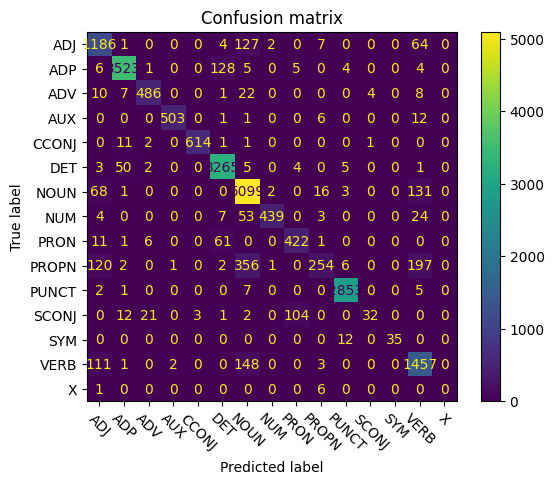

In [167]:
tagger.evaluate(devCorpus)

For now we obtain an accuracy of 0.9083 and a F1-score of 0.8997. Let's try with different threshold for the appearances of infrequent words. We opted to implement a method to help us make a hyperparameter sweep and check the best value for this particular case.In this case we train the model assigning 'UNK' to words with less than 3, 5, 10, 20 and 25 appearances.

In [168]:
import warnings
warnings.filterwarnings('ignore')
def unk_sweep(trainCorpus, train_multi_tokens, test_Corpus, unk_array, suffix=False):

  for unk in unk_array:
    # Generate and train the model
    tagger = HMM_PoS_Tagger()
    tagger.setMultiTokensDict(trainCorpus_multi_tokens)
    tagger.train(trainCorpus, unk_value=unk, suffix=suffix)

    # Evaluate the model
    print("#### UNK-VALUE:", unk, "####")
    tagger.evaluate_summary(test_Corpus)
    print("\n")

unk_sweep(trainCorpus, trainCorpus_multi_tokens, devCorpus, [3,5,10,15,20,25])    

Training...
#### UNK-VALUE: 3 ####
SCORE: 20168 / 22203
Metrics:

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.908346 |
+----------+----------+
| Precison | 0.909644 |
+----------+----------+
| Recall   | 0.908346 |
+----------+----------+
| F1 Score | 0.899748 |
+----------+----------+


Training...
#### UNK-VALUE: 5 ####
SCORE: 19951 / 22203
Metrics:

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.898572 |
+----------+----------+
| Precison | 0.900075 |
+----------+----------+
| Recall   | 0.898572 |
+----------+----------+
| F1 Score | 0.888866 |
+----------+----------+


Training...
#### UNK-VALUE: 10 ####
SCORE: 19617 / 22203
Metrics:

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.883529 |
+----------+----------+
| Precison | 0.888986 |
+----------+----------+
| Recall   | 0.883529 |
+----------+----------+
| F1 Score | 0.87132  |
+----------+----------+


Tra

As we can see the results decrease gradually when we increase the appearances value. This could be logical given the fact that replacing infrequent words with a 'UNK' token can lead to conflating a lot of information and increasing the number of words replaced increases this conflation.

The other solution for unseen words is the suffix matrix created in the training step. The idea is that maybe the unknown word of the test corpus has the suffix in common with a word in the train corpus and with that similarity we might be able to provide some information of the syntactical role of the new word. Let's try this:

Training...
Evaluating...
SCORE: 20444 / 22203
The results of the evaluations are:

Metrics:

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.920776 |
+----------+----------+
| Precison | 0.920708 |
+----------+----------+
| Recall   | 0.920776 |
+----------+----------+
| F1 Score | 0.912628 |
+----------+----------+

Counts' differences:

+-------+---------------+---------------------+--------------+
| Tag   |   Gold counts |   Prediction counts |   Difference |
+=======+===============+=====================+==============+
| PRON  |           502 |                 545 |           43 |
+-------+---------------+---------------------+--------------+
| SYM   |            47 |                  35 |           12 |
+-------+---------------+---------------------+--------------+
| ADJ   |          1391 |                1426 |           35 |
+-------+---------------+---------------------+--------------+
| VERB  |          1722 |                1963 |     

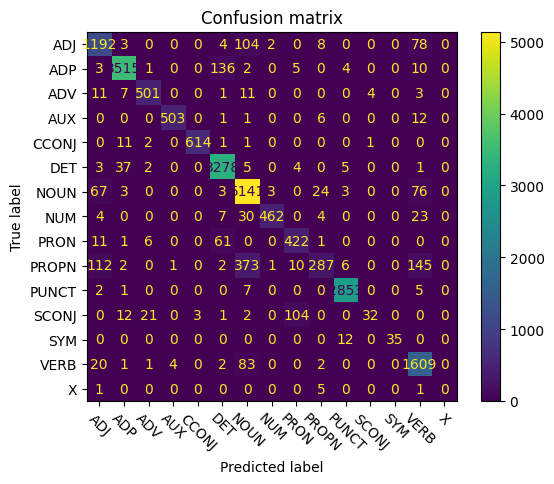

In [169]:
tagger = HMM_PoS_Tagger()
tagger.setMultiTokensDict(trainCorpus_multi_tokens)
tagger.train(trainCorpus, unk_value=3, suffix=True)
tagger.evaluate(devCorpus)

There is an increment of both accuracy and F1-score using this solution, which is a first step to confirm that suffixes can provide a lot of information of the syntactic role of words. 

We can do another hyperparameter sweep to see if there is any improvement with higher appearances of infrequent word contrary to the model that does not use the suffix matrix:

In [170]:
unk_sweep(trainCorpus, trainCorpus_multi_tokens, devCorpus, [3,5,10,15,20,25], True)

Training...
#### UNK-VALUE: 3 ####
SCORE: 20444 / 22203
Metrics:

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.920776 |
+----------+----------+
| Precison | 0.920708 |
+----------+----------+
| Recall   | 0.920776 |
+----------+----------+
| F1 Score | 0.912628 |
+----------+----------+


Training...
#### UNK-VALUE: 5 ####
SCORE: 20320 / 22203
Metrics:

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.915192 |
+----------+----------+
| Precison | 0.914943 |
+----------+----------+
| Recall   | 0.915192 |
+----------+----------+
| F1 Score | 0.90615  |
+----------+----------+


Training...
#### UNK-VALUE: 10 ####
SCORE: 20180 / 22203
Metrics:

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.908886 |
+----------+----------+
| Precison | 0.908434 |
+----------+----------+
| Recall   | 0.908886 |
+----------+----------+
| F1 Score | 0.898568 |
+----------+----------+


Tra

Once again, increasing the number of appearances does not produce better results. Taking this into account let's evaluate our model with the test corpus

Training...
Evaluating...
SCORE: 27504 / 29569
The results of the evaluations are:

Metrics:

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.930163 |
+----------+----------+
| Precison | 0.929605 |
+----------+----------+
| Recall   | 0.930163 |
+----------+----------+
| F1 Score | 0.92314  |
+----------+----------+

Counts' differences:

+-------+---------------+---------------------+--------------+
| Tag   |   Gold counts |   Prediction counts |   Difference |
+=======+===============+=====================+==============+
| PRON  |           738 |                 802 |           64 |
+-------+---------------+---------------------+--------------+
| SYM   |            55 |                  52 |            3 |
+-------+---------------+---------------------+--------------+
| ADJ   |          1791 |                1924 |          133 |
+-------+---------------+---------------------+--------------+
| VERB  |          2609 |                2799 |     

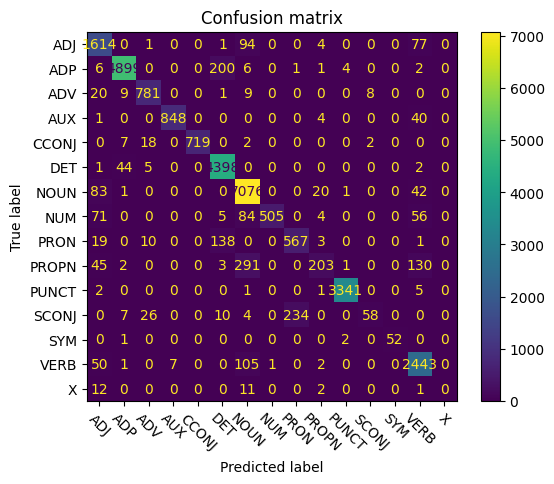

In [171]:
tagger = HMM_PoS_Tagger()
tagger.setMultiTokensDict(trainCorpus_multi_tokens)
tagger.train(trainCorpus, unk_value=3, suffix=True)
tagger.evaluate(testCorpus)

As a result we obtain 0.9301% of accuracy and a F1-score of 0.9231% which are very positive results. Let's try to analyze which are the tags that suffer more in the evaluation:

In [172]:
tagger.evaluate_per_tag(testCorpus)

              precision    recall  f1-score   support

         ADJ     0.8389    0.9012    0.8689      1791
         ADP     0.9855    0.9570    0.9711      5119
         ADV     0.9287    0.9432    0.9359       828
         AUX     0.9918    0.9496    0.9703       893
       CCONJ     1.0000    0.9612    0.9802       748
         DET     0.9247    0.9883    0.9555      4450
        NOUN     0.9210    0.9796    0.9494      7223
         NUM     0.9980    0.6966    0.8205       725
        PRON     0.7070    0.7683    0.7364       738
       PROPN     0.8320    0.3007    0.4418       675
       PUNCT     0.9976    0.9973    0.9975      3350
       SCONJ     0.8529    0.1711    0.2850       339
         SYM     1.0000    0.9455    0.9720        55
        VERB     0.8728    0.9364    0.9035      2609
           X     0.0000    0.0000    0.0000        26

    accuracy                         0.9302     29569
   macro avg     0.8567    0.7664    0.7859     29569
weighted avg     0.9296   

As we can see there are some tags that present worse results than the others. For instance, the 'X' tag is not predicted at all in the whole test corpus and as we can see in the results of dev it happens the same. Taking into account the X tag is for 'Others' it's probably difficult to predict due to not having a real pattern of after which tag we can find it. Also, it's possible that words tagged as X are usually infrequent, so we might replace them as 'UNK' in the training process. If we look in the test corpus for some examples of X tagged words we can find: drill, n, τ, μ... Given that these "words" are not common in Portuguese speech (drill is an English word and the others are greek letters), it's quite normal that the prediction of our model is null.

Propper names also show quite poor results. The same as with the 'X' tag, it's possible that the repetition of proper names in our Corpus is low which leads to the replacement of them as 'UNK' tokens. Knowing the source of the corpus, it's natural to think that in an article the repetition of a proper name more than 3 times is unusual. Moreover, is quite atypical to think that the articles in the same corpus cite or mention the same proper names as the articles in the train corpus.

We can also see that the less represented tags in train and test are usually the ones that present worse results (f.e. 'SCONJ'), contrary to more popular classes.

As it was expected, the 'PUNCT' tag has the best results, this could be because the punctuation symbols used are usually finite and normally don't have other syntactic roles.